In [1]:
# this function is doing cleanng data and preprocessing then one-hot encoding 
def cleaning(dataset):
    for i in cat:
        dataset[i] = dataset[i].fillna(dataset[i].mode().values[0])
    for s in num:
        if dataset[s].dtype== object:
            dataset[s]=dataset[s].str.replace(",",".")
            dataset[s]=dataset[s].astype(float)
    for j in num:
        
        dataset[j]=dataset[j].fillna(dataset[j].median())
    scal=MinMaxScaler()
    dataset[num]=scal.fit_transform(dataset[num])
    dataset=pd.get_dummies(dataset,drop_first=True)
    
    return dataset
    

# importing exploring libraries 

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed

# data analysis and wrangling
import pandas as pd 
import numpy as np 

# data visulization
import matplotlib.pyplot as plt 
%matplotlib inline 

# exploring datasets

In [10]:
train = pd.read_csv("training.csv",delimiter=";")
val = pd.read_csv("validation.csv",delimiter=";")

In [11]:
train.head(5)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3661 non-null object
variable2     3661 non-null object
variable3     3700 non-null object
variable4     3636 non-null object
variable5     3636 non-null object
variable6     3634 non-null object
variable7     3634 non-null object
variable8     3700 non-null object
variable9     3700 non-null object
variable10    3700 non-null object
variable11    3700 non-null int64
variable12    3700 non-null object
variable13    3700 non-null object
variable14    3600 non-null float64
variable15    3700 non-null int64
variable17    3600 non-null float64
variable18    1555 non-null object
variable19    3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 549.3+ KB


In [15]:
train.describe()

,variable11,variable14,variable15,variable17,variable19
count,3700.000000,3600.000000,3700.000000,3.600000e+03,3700.000000
mean,4.160000,162.695000,2246.705946,1.626950e+06,0.925405
std,6.750553,156.045682,8708.571126,1.560457e+06,0.262772
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,2.000000,120.000000,113.000000,1.200000e+06,1.000000
75%,6.000000,280.000000,1059.750000,2.800000e+06,1.000000
max,67.000000,1160.000000,100000.000000,1.160000e+07,1.000000


In [13]:
val.head(4)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,"32,33","0,00075",u,g,e,bb,"1,585",t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,"23,58","0,000179",u,g,c,v,"0,54",f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,"36,42","7,5e-05",y,p,d,v,"0,585",f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,"18,42","0,0010415",y,p,aa,v,"0,125",t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.


In [16]:
val.describe()

,variable11,variable14,variable15,variable17,variable19
count,200.000000,197.000000,200.000000,1.970000e+02,200.000000
mean,2.795000,199.903553,659.720000,1.999036e+06,0.500000
std,4.233508,209.373399,1603.900294,2.093734e+06,0.501255
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,80.000000,0.000000,8.000000e+05,0.000000
50%,0.000000,160.000000,4.500000,1.600000e+06,0.500000
75%,5.000000,280.000000,500.000000,2.800000e+06,1.000000
max,20.000000,2000.000000,10000.000000,2.000000e+07,1.000000


In [7]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
variable1     197 non-null object
variable2     197 non-null object
variable3     200 non-null object
variable4     198 non-null object
variable5     198 non-null object
variable6     197 non-null object
variable7     197 non-null object
variable8     200 non-null object
variable9     200 non-null object
variable10    200 non-null object
variable11    200 non-null int64
variable12    200 non-null object
variable13    200 non-null object
variable14    197 non-null float64
variable15    200 non-null int64
variable17    197 non-null float64
variable18    89 non-null object
variable19    200 non-null int64
classLabel    200 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 29.8+ KB


# Feature Engineering

# Data Preprocessing

#### we drop coulmn "variable18" because the most of columns is null in the validationn data and train data and create a new

#### variabels to save train and validation data in it to avoid changeing in the main train and validation data  

In [17]:
df_train=train.drop(columns=["variable18"],axis=1)
df_val=val.drop(columns=["variable18"],axis=1)

In [18]:
df_train.shape

(3700, 18)

In [19]:
df_val.shape

(200, 18)

#### concat the train datasets and valiidation data to do preprocessing on it and  i alsa create a function that doing it directly

In [22]:
data=pd.concat([df_train,df_val])

In [24]:
data.isnull().sum()

variable1      42
variable2      42
variable3       0
variable4      66
variable5      66
variable6      69
variable7      69
variable8       0
variable9       0
variable10      0
variable11      0
variable12      0
variable13      0
variable14    103
variable15      0
variable17    103
variable19      0
classLabel      0
dtype: int64

In [25]:
data.head(5)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,0,no.


#### also i create two varible to make it easy to cleaing and preprocessing on catigorical columns  and numerical columns 

In [26]:
cat=["variable1","variable4","variable5","variable6","variable7","variable9","variable10","variable12","variable13"]
num=["variable2","variable3","variable8","variable11","variable14","variable15","variable17","variable19"]

In [28]:
#filling null in catigorical with most most frequently
for i in cat:
    data[i] = data[i].fillna(data[i].mode().values[0])

#### we change how float number is written to change it from object dtype to float dtype

In [29]:
for s in num:
    if data[s].dtype== object:
        data[s]=data[s].str.replace(",",".")
        data[s]=data[s].astype(float)

In [30]:
data.head(3)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.75,f,t,1,t,g,80.0,5,800000.0,0,no.
1,b,16.92,0.000034,y,p,k,v,0.29,f,f,0,f,s,200.0,0,2000000.0,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.00,f,t,1,f,g,96.0,19,960000.0,0,no.


In [31]:
for j in num:
    data[j]=data[j].fillna(data[j].median())

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 199
Data columns (total 18 columns):
variable1     3900 non-null object
variable2     3900 non-null float64
variable3     3900 non-null float64
variable4     3900 non-null object
variable5     3900 non-null object
variable6     3900 non-null object
variable7     3900 non-null object
variable8     3900 non-null float64
variable9     3900 non-null object
variable10    3900 non-null object
variable11    3900 non-null int64
variable12    3900 non-null object
variable13    3900 non-null object
variable14    3900 non-null float64
variable15    3900 non-null int64
variable17    3900 non-null float64
variable19    3900 non-null int64
classLabel    3900 non-null object
dtypes: float64(5), int64(3), object(10)
memory usage: 578.9+ KB


In [33]:
data.head(3)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.75,f,t,1,t,g,80.0,5,800000.0,0,no.
1,b,16.92,0.000034,y,p,k,v,0.29,f,f,0,f,s,200.0,0,2000000.0,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.00,f,t,1,f,g,96.0,19,960000.0,0,no.


## scaling the numerical columns 

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
data[num]=scaler.fit_transform(data[num])

C:\Users\toshiba\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [38]:
data.head(3)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
0,a,0.062707,0.019286,u,g,c,v,0.061404,f,t,0.014925,t,g,0.040,0.00005,0.040,0.0,no.
1,b,0.047669,0.011964,y,p,k,v,0.010175,f,f,0.000000,f,s,0.100,0.00000,0.100,0.0,no.
2,b,0.263158,0.040179,u,g,ff,ff,0.000000,f,t,0.014925,f,g,0.048,0.00019,0.048,0.0,no.


### one-hot-encoding for catigorical columns 

In [42]:
data=pd.get_dummies(data,drop_first=True)
data.head(4)

,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,variable1_b,variable4_u,...,variable7_n,variable7_o,variable7_v,variable7_z,variable9_t,variable10_t,variable12_t,variable13_p,variable13_s,classLabel_yes.
0,0.062707,0.019286,0.061404,0.014925,0.040,0.00005,0.040,0.0,0,1,...,0,0,1,0,0,1,1,0,0,0
1,0.047669,0.011964,0.010175,0.000000,0.100,0.00000,0.100,0.0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0.263158,0.040179,0.000000,0.014925,0.048,0.00019,0.048,0.0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,0.517594,0.047679,0.011754,0.000000,0.000,0.00120,0.000,0.0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [43]:
data.shape

(3900, 40)

### after doing prepocessing in all dataset i also divided it to train and validition data 

In [44]:
train_set=data.iloc[:3700,:]
val_set=data.iloc[3700:,:]

In [47]:
train_set["classLabel_yes."].value_counts()

1    3424
0     276
Name: classLabel_yes., dtype: int64

#### i saw that classlabel have imbalanced data that give to option upsampling or down sample for the data 

### up-sample to impalnced data 

### when i try to get accurce of up sample that give me accurace 60

In [50]:
class_no=train_set[train_set["classLabel_yes."]==0]

In [51]:
class_no.shape

(276, 40)

In [52]:
up_sample=pd.concat([train_set,df,df,df,df,df,df,df],axis=0)

In [53]:
x_up=up_sample.iloc[:,:-1].values
y_up=up_sample["classLabel_yes."].values

### train and validation the main data without up-sample 

In [58]:
X_train=train_set.iloc[:,:-1].values
Y_train=train_set["classLabel_yes."].values
x_val=val_set.iloc[:,:-1].values
y_val=val_set["classLabel_yes."].values

In [59]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train, test_size=0.20, random_state=0)

# Algorithms Training

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()

In [87]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,Y_train)

# Predicting the Test set results
y_pred = knn.predict(x_val)

In [88]:
accuracy = accuracy_score(y_val,y_pred)
accuracy

0.69

In [91]:
import sklearn.metrics as eva
cm = eva.confusion_matrix(y_val, y_pred)
cm

array([[54, 53],
       [ 9, 84]], dtype=int64)

In [92]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [151]:
logi_clf = LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=100)
logi_parm = {"C": [0.1, 0.5, 1, 5, 10, 50],
            'random_state': [0,1,2,3,4,5]}

svm_clf = SVC(probability=True)
svm_parm = {'kernel': ['rbf', 'poly'], 
            'C': [1, 5, 50, 100, 500, 1000], 
            'degree': [3, 5, 7], 
            'gamma': ['auto', 'scale'],
           'random_state': [0,1,2,3,4,5]}

dt_clf = DecisionTreeClassifier()
dt_parm = {'criterion':['gini', 'entropy'],
          'random_state': [0,1,2,3,4,5]}

knn_clf = KNeighborsClassifier()
knn_parm = {'n_neighbors':[5, 10, 15, 20], 
            'weights':['uniform', 'distance'], 
            'p': [1,2]}

gnb_clf = GaussianNB()
gnb_parm = {'priors':['None']}

clfs = [logi_clf, svm_clf, dt_clf, knn_clf]
params = [logi_parm, svm_parm, dt_parm, knn_parm] 
clf_names = ['logistic', 'SVM', 'DT', 'KNN', 'GNB']

In [ ]:
clfs_opt = []
clfs_best_scores = []
clfs_best_param = []
for clf_, param in zip(clfs, params):
    clf = RandomizedSearchCV(clf_, param, cv=10)
    clf.fit(X_train,Y_train)
    clfs_opt.append(clf.best_estimator_)
    clfs_best_scores.append(clf.best_score_)
    clfs_best_param.append(clf.best_params_)

In [100]:
gnb_score = cross_val_score(gnb_clf,X_train, Y_train, cv=5).mean()
gnb_clf.fit(X_train, Y_train)
clfs_opt.append(gnb_clf)
clfs_best_scores.append(gnb_score)

In [101]:
all_Clfs_dict = {}
all_Clfs_list = []
for name, clf in zip(clf_names, clfs_opt):
    all_Clfs_dict[name] = clf
    all_Clfs_list.append((name, clf))

In [102]:
max(clfs_best_scores)

1.0

In [104]:
arg = np.argmax(clfs_best_scores)
clfs_best_param[arg]

{'random_state': 4, 'C': 50}

In [106]:
clf = clfs_opt[arg]

In [107]:
preds = clf.predict(x_val)

In [114]:
accuracy_score(y_val,y_pred)

0.69

In [115]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.86      0.50      0.64       107
           1       0.61      0.90      0.73        93

   micro avg       0.69      0.69      0.69       200
   macro avg       0.74      0.70      0.68       200
weighted avg       0.74      0.69      0.68       200

Confusion matrix, without normalization
[[54 53]
 [ 9 84]]


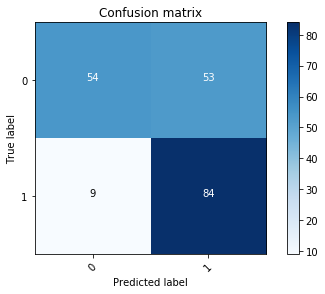

In [119]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val,y_pred)
np.set_printoptions(precision=2)

print (classification_report(y_val, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

## traing to improve accurce with ensemble 

In [120]:
import sklearn.ensemble as ens

clf = ens.RandomForestClassifier()
param = {'n_estimators':[10,50,100,500,100],
         'criterion': ['gini', 'entropy'],}
RF = RandomizedSearchCV(clf, param, cv=5)
RF.fit(X_train, Y_train)
RF.best_score_

1.0

In [121]:
accuracy_score(y_val, RF.predict(x_val))

0.58

In [ ]:
bag = ens.BaggingClassifier(base_estimator=clfs_opt[arg])
param = {'n_estimators':[10,50,100,500,100],
        'max_samples':[1.0, 0.9, 0.8],
        'bootstrap_features':[False, True],
        'random_state': [0,1,2,3,4,5]}
best_est_bagging = RandomizedSearchCV(bag, param, cv=5)
best_est_bagging.fit(X_train, Y_train)

In [125]:
best_est_bagging.best_score_

1.0

In [126]:
clf = best_est_bagging.best_estimator_
pred = clf.predict(x_val)

In [128]:
accuracy = accuracy_score(y_val,pred)
accuracy

0.495

### the best algorithm that give me accurce is KNN = 69% the accurce is because imbalnced data so i traid to get better accurce with deep learning 

# deep learning 

In [129]:
from keras.models import Sequential
from keras.layers import *
from sklearn.utils import class_weight as cw

Using TensorFlow backend.


In [130]:
def get_weight(y):
    class_weight_current =  cw.compute_class_weight('balanced', np.unique(y), y)
    return class_weight_current
class_weight = get_weight(Y_train.flatten())


In [146]:
model2 = Sequential()
# model2.add(Dense(50, input_dim=39, activation='relu'))
# model2.add(Dense(100, activation='relu'))
# model2.add(Dense(50, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc'])
# Train the model
model2.fit(
    X_train,
    Y_train,
    validation_split=0.15,
    epochs=50,
    shuffle=True,
    verbose=2,
    class_weight = class_weight
)

Train on 3145 samples, validate on 555 samples
Epoch 1/50
 - 1s - loss: 0.4453 - acc: 0.9186 - val_loss: 0.3026 - val_acc: 1.0000
Epoch 2/50
 - 0s - loss: 0.3143 - acc: 0.9199 - val_loss: 0.1952 - val_acc: 1.0000
Epoch 3/50
 - 0s - loss: 0.2577 - acc: 0.9141 - val_loss: 0.1402 - val_acc: 1.0000
Epoch 4/50
 - 0s - loss: 0.2302 - acc: 0.9126 - val_loss: 0.1104 - val_acc: 1.0000
Epoch 5/50
 - 0s - loss: 0.2146 - acc: 0.9126 - val_loss: 0.0929 - val_acc: 1.0000
Epoch 6/50
 - 0s - loss: 0.2041 - acc: 0.9129 - val_loss: 0.0816 - val_acc: 1.0000
Epoch 7/50
 - 0s - loss: 0.1960 - acc: 0.9129 - val_loss: 0.0742 - val_acc: 1.0000
Epoch 8/50
 - 0s - loss: 0.1891 - acc: 0.9145 - val_loss: 0.0696 - val_acc: 1.0000
Epoch 9/50
 - 0s - loss: 0.1828 - acc: 0.9151 - val_loss: 0.0651 - val_acc: 1.0000
Epoch 10/50
 - 0s - loss: 0.1770 - acc: 0.9154 - val_loss: 0.0626 - val_acc: 1.0000
Epoch 11/50
 - 0s - loss: 0.1714 - acc: 0.9173 - val_loss: 0.0600 - val_acc: 1.0000
Epoch 12/50
 - 0s - loss: 0.1661 - acc

In [147]:
accuracy =accuracy_score(y_val, model2.predict_classes(x_val))

In [148]:
accuracy

0.67